In [1]:
# school — аббревиатура школы, в которой учится ученик
# sex — пол ученика ('F' - женский, 'M' - мужской)
# age — возраст ученика (от 15 до 22)
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# schoolsup — дополнительная образовательная поддержка (yes или no)
# famsup — семейная образовательная поддержка (yes или no)
# paid — дополнительные платные занятия по математике (yes или no)
# activities — дополнительные внеучебные занятия (yes или no)
# nursery — посещал детский сад (yes или no)
# higher — хочет получить высшее образование (yes или no)
# internet — наличие интернета дома (yes или no)
# romantic — в романтических отношениях (yes или no)
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# absences — количество пропущенных занятий
# score — баллы по госэкзамену по математике

In [2]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

In [3]:
# Место для объявления используемых функций
# Функция - быстрая сводка статистических данных по признаку.


def show_statistics(df_analyze):
    flag = 0
    stat_data = []
    IQR = df_analyze.quantile(0.75, interpolation='midpoint') - \
        df_analyze.quantile(0.25, interpolation='midpoint')
    perc25 = df_analyze.quantile(0.25)
    perc75 = df_analyze.quantile(0.75)
    min_range = df_analyze.quantile(0.25, interpolation='midpoint') - 1.5*IQR
    max_range = df_analyze.quantile(0.75, interpolation='midpoint') + 1.5*IQR
    for i in df_analyze:
        if (i < min_range)or(i > max_range):
            flag += 1
    if (flag > 0):
        print('Имеются выбросы в кол-ве: ', flag)
    else:
        print('Выбросов нет!')
    mean_df = df_analyze.mean()
    median_df = df_analyze.median()
    std_df = df_analyze.std()
    sweep = df_analyze.max() - df_analyze.min()
    # Добавляем найденные данные в список статистических данных (тааавталогия))
    stat_data.append(mean_df)
    stat_data.append(median_df)
    stat_data.append(std_df)
    stat_data.append(IQR)
    stat_data.append(sweep)
    stat_data.append(perc25)
    stat_data.append(perc75)
    print('Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): '
          '\n Среднее[0]:', round(mean_df, 7), '\n Медиана[1]:', median_df, '\n СКО[2]:', round(std_df, 7), '\n Межквартильный размах-IQR[3]', IQR, '\n Размах[4]', sweep, '\n 25% перцентиль[5]:', perc25, '\n 75% перцентиль[6]:', perc75, "\n Границы выбросов: [{f}, {l}].".format(f=min_range, l=max_range))
    return stat_data


# Функция первичного осмоттра столбцов
def columns_info(col_value):
    if stud_math[col_value].dtype == object:
        indexes = list(stud_math[col_value].value_counts().index)
        print(stud_math[col_value].value_counts())
        print('Уникальных значений:', stud_math[col_value].nunique())
        print('Пропущенных значений в столбце:',
              stud_math[col_value].isnull().sum(axis=0))
    else:
        fig, ax = plt.subplots()
        stud_math[col_value].hist(ax=ax)
        stud_math[col_value].describe
        ax.set_xlabel(col_value)
        plt.show
        show_statistics(stud_math[col_value])
        print(print('Пропущенных значений в столбце:',
                    stud_math[col_value].isnull().sum(axis=0)))

# Функция замена пропусков и nan на None


def replace_empties(col):
    stud_math[col] = stud_math[col].apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                          else x)

# Функция, показывающая все элементы в столбце


def show_values(x):
    list_score = []
    for i in x:
        list_score.append(i)
    display(list_score)

# Функция построения боксплота номинативных переменных


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Функция проверки статистической разницы в распредлении оценок по номинативным признакам
# Используется тест Стьюдента
# Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам
# неразличимы


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Функция замены пропущенных значений на other


def fill_other(col):
    stud_math.loc[(stud_math[col].isnull()), col] = 'other'

In [4]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# Во многих столбцах есть пропущенные значения, всего 29 колонок
# Кол-во числовых столбцов: 12; Кол-во строковых столбцов: 17

In [6]:
# Удалим колонку 'studytime, granular' так как ее нет в описании Датасета
stud_math.drop(['studytime, granular'], inplace=True, axis=1)

In [7]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Имеются выбросы в кол-ве:  1
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 16.6962025 
 Медиана[1]: 17.0 
 СКО[2]: 1.2760427 
 Межквартильный размах-IQR[3] 2.0 
 Размах[4] 7 
 25% перцентиль[5]: 16.0 
 75% перцентиль[6]: 18.0 
 Границы выбросов: [13.0, 21.0].
Пропущенных значений в столбце: 0
None


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

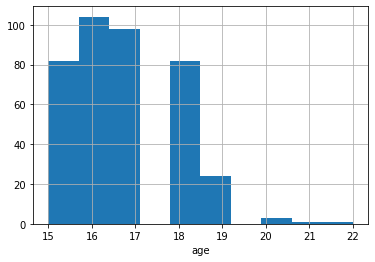

In [8]:
# Исследуемый числовые признаки
# Возраст
columns_info('age')
# Так как мода меньше среднего  медианы, распределение близко к нормальному
# Имеется один выброс, но здравый смысл подсказывает его не убирать
# Пропусков нет.
# Большая часть учащихся в датасете - молодые люди в влзрасте 15-18 лет
stud_math.age.value_counts()

Имеются выбросы в кол-ве:  7
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 1.4386921 
 Медиана[1]: 1.0 
 СКО[2]: 0.6941807 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 3.0 
 25% перцентиль[5]: 1.0 
 75% перцентиль[6]: 2.0 
 Границы выбросов: [-0.5, 3.5].
Пропущенных значений в столбце: 28
None


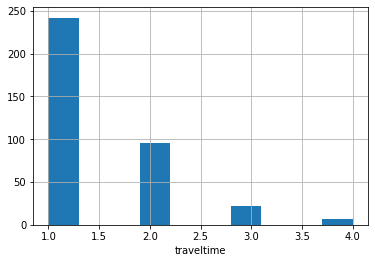

In [9]:
# Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин.,
# 4 - >60 мин.)
columns_info('traveltime')
# Наблюдаем положительное распределение, смещенное вправо. Имеются выбросы и
# пропущенные значения.По соображениям здравого смысла убирать их не будем.
# Пропуски можно заполнить медианным значения, предположив, что близкое
# расположение домов к школам - общая тенденция
# Пропущенные значения заменю медианой по выборке,
median_traveltime = stud_math.traveltime.median()
stud_math.traveltime = stud_math.traveltime.apply(lambda x: median_traveltime
                                                  if pd.isnull(x) else x)
# По гистограмме можно сделать вывод - большинство детей живут вблизи школ.

Имеются выбросы в кол-ве:  27
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 2.0386598 
 Медиана[1]: 2.0 
 СКО[2]: 0.8420783 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 3.0 
 25% перцентиль[5]: 1.0 
 75% перцентиль[6]: 2.0 
 Границы выбросов: [-0.5, 3.5].
Пропущенных значений в столбце: 7
None


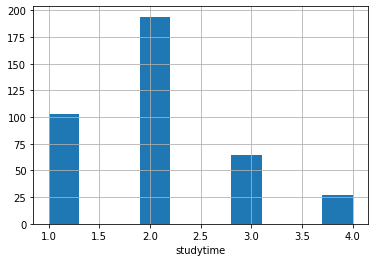

In [10]:
# Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов,
# 3 - 5-10 часов, 4 - >10 часов
columns_info('studytime')
# Распредление близко к нормальному.
# Имеютсяя выбросы. По соображениям здравого смысла убирать их не будем
# Пропуски заменю средним значеним.
mean_studytime = stud_math.studytime.mean()
stud_math.studytime = stud_math.studytime.apply(lambda x: mean_studytime
                                                if pd.isnull(x) else x)
# Чаще всего у детей остается меньше 5 часов в неделю на учебу помимо школы.

Имеются выбросы в кол-ве:  80
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 0.3378016 
 Медиана[1]: 0.0 
 СКО[2]: 0.7431352 
 Межквартильный размах-IQR[3] 0.0 
 Размах[4] 3.0 
 25% перцентиль[5]: 0.0 
 75% перцентиль[6]: 0.0 
 Границы выбросов: [0.0, 0.0].
Пропущенных значений в столбце: 22
None


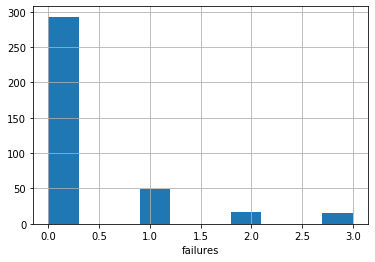

In [11]:
# Количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
columns_info('failures')
# Неинформативный столбец, так как 0 - это может быть 0 неудач и 10 и более, мы
# можем только говорить, и так как таких  0 значений большинство, данный признак не будем учитывать
# при построении будущей модели
# stud_math.failures.value_counts()
# Удалим колонку failures
stud_math.drop(['failures'], inplace=True, axis=1)

Имеются выбросы в кол-ве:  25
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 3.9375 
 Медиана[1]: 4.0 
 СКО[2]: 0.9272774 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 6.0 
 25% перцентиль[5]: 4.0 
 75% перцентиль[6]: 5.0 
 Границы выбросов: [2.5, 6.5].
Пропущенных значений в столбце: 27
None


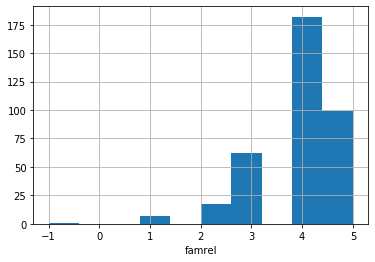

In [12]:
# Cемейные отношения (от 1 - очень плохо до 5 - очень хорошо)
columns_info('famrel')
# Распределение близко к нормальному: мода равна медиане, среднее близко к ним.
# Видим, что есть выбросы,а также пропущенные значения.
# Пропущенные значения заменю средним по выборке.
# Выбросы удалю

Имеются выбросы в кол-ве:  25
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 3.9375 
 Медиана[1]: 4.0 
 СКО[2]: 0.9272774 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 6.0 
 25% перцентиль[5]: 4.0 
 75% перцентиль[6]: 5.0 
 Границы выбросов: [2.5, 6.5].


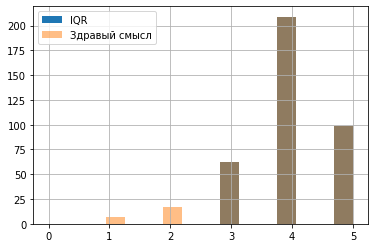

In [13]:
famrel_stat_data = show_statistics(stud_math.famrel)
perc25 = famrel_stat_data[5]
perc75 = famrel_stat_data[6]
IQR = famrel_stat_data[3]
# Замена пропущенных значений на среднее.
stud_math.famrel = stud_math.famrel.apply(lambda x: famrel_stat_data[0]
                                          if pd.isnull(x) else x)
# формулой интерквантильного расстояния
stud_math.famrel.loc[stud_math.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 5),
                                                                                        label='IQR')
# формула здравого осмысления
stud_math.famrel.loc[stud_math.famrel > 0].hist(alpha=0.5, bins=16, range=(0, 5),
                                                label='Здравый смысл')
plt.legend()
# Выходит, если будет пользоваться формулой интерквантильного расстояния,и удалить все выбросы,
# потеряем много данных.
# В данном случае, будем полагаться на здравый смысл
stud_math = stud_math.loc[stud_math.famrel > 0]

Имеются выбросы в кол-ве:  18
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 3.2349869 
 Медиана[1]: 3.0 
 СКО[2]: 0.9932378 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 4.0 
 25% перцентиль[5]: 3.0 
 75% перцентиль[6]: 4.0 
 Границы выбросов: [1.5, 5.5].
Пропущенных значений в столбце: 11
None


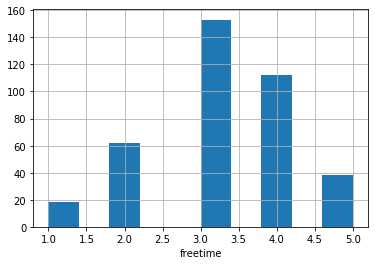

In [14]:
# Свободное время после школы (от 1 - очень мало до 5 - очень мого)
columns_info('freetime')
# Распределение близко к нормальному: мода равна медиане, среднее близко к ним.
# Видим, что есть выбросы,а также пропущенные значения.
# Пропущенные значения заменю средним по выборке,
# считая что ситуация со свободным временем примерно одинакова у всех школьников
mean_freetime = stud_math.freetime.mean()
stud_math.freetime = stud_math.freetime.apply(lambda x: mean_freetime
                                              if pd.isnull(x) else x)
# Выбросы удалять не будем, в данном случае побеждает вновь здравый смысл
# Кроме целых значений, встречается дробное 3.9375,но нигде не указано что такого
# значения не может быть, указан лишь дипазон от 1 до 5.
# У большинства учащихся много свободного времение после школы.

Выбросов нет!
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 3.1088083 
 Медиана[1]: 3.0 
 СКО[2]: 1.1159179 
 Межквартильный размах-IQR[3] 2.0 
 Размах[4] 4.0 
 25% перцентиль[5]: 2.0 
 75% перцентиль[6]: 4.0 
 Границы выбросов: [-1.0, 7.0].
Пропущенных значений в столбце: 8
None


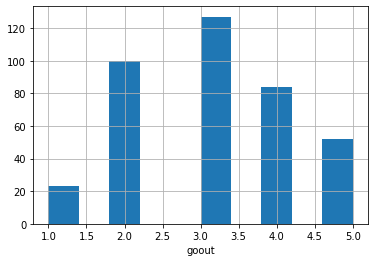

In [15]:
# Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
columns_info('goout')
# Распределение близко к нормальному: мода равна медиане, среднее близко к ним.
# Выбросов нет, однако есть пропущенные значения.
# Пропущенные значения заменю средним по выборке,
# считая что ситуация со свободным временем примерно одинакова у всех школьников
mean_goouttime = stud_math.goout.mean()
stud_math.goout = stud_math.goout.apply(lambda x: mean_goouttime
                                        if pd.isnull(x) else x)
# Большинство учащихся имеют достаточно времени на проведение его с друзьями.

Выбросов нет!
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 3.5277045 
 Медиана[1]: 4.0 
 СКО[2]: 1.3958168 
 Межквартильный размах-IQR[3] 2.0 
 Размах[4] 4.0 
 25% перцентиль[5]: 3.0 
 75% перцентиль[6]: 5.0 
 Границы выбросов: [0.0, 8.0].
Пропущенных значений в столбце: 15
None


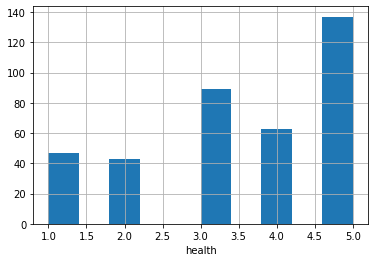

In [16]:
# Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
columns_info('health')
# stud_math.health.value_counts()
# Наблюдаем отрицательное распредление, так как медиана и мода больше среднего.
# Выбросов нет, однако есть пропущенные значения.
# Пропущенные значения заменю медианой по выборке,
median_health = stud_math.health.median()
stud_math.health = stud_math.health.apply(lambda x: median_health
                                          if pd.isnull(x) else x)
# Большинство учащихся имеют хорошее или очень хорошее здоровье

Имеются выбросы в кол-ве:  17
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 7.2617801 
 Медиана[1]: 4.0 
 СКО[2]: 23.4934414 
 Межквартильный размах-IQR[3] 8.0 
 Размах[4] 385.0 
 25% перцентиль[5]: 0.0 
 75% перцентиль[6]: 8.0 
 Границы выбросов: [-12.0, 20.0].
Пропущенных значений в столбце: 12
None


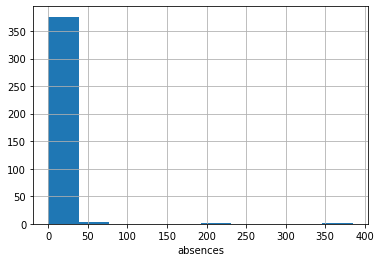

In [17]:
# Количество пропущенных занятий
columns_info('absences')
# stud_math.absences.value_counts()
# Наблюдаем положительное распредление, так как медиана и мода меньше среднего.
# Имеются выбросы.
# Пропущенные значения заменю медианой по выборке,
median_absences = stud_math.absences.median()
stud_math.absences = stud_math.absences.apply(lambda x: median_absences
                                              if pd.isnull(x) else x)

Имеются выбросы в кол-ве:  17
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 7.1624365 
 Медиана[1]: 4.0 
 СКО[2]: 23.1387894 
 Межквартильный размах-IQR[3] 8.0 
 Размах[4] 385.0 
 25% перцентиль[5]: 0.0 
 75% перцентиль[6]: 8.0 
 Границы выбросов: [-12.0, 20.0].


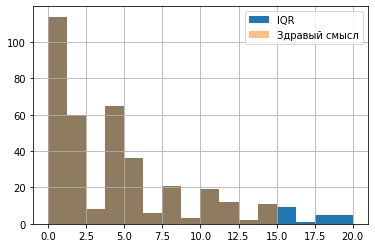

In [18]:
# Теперь проанализируем выбросы.
absences_stat_data = show_statistics(stud_math.absences)
perc25 = absences_stat_data[5]
perc75 = absences_stat_data[6]
IQR = absences_stat_data[3]

# формула интерквантильного расстояния
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 20),
                                                                                            label='IQR')
# формула здравого осмысления
stud_math.absences.loc[stud_math.absences < 15].hist(alpha=0.5, bins=16, range=(0, 20),
                                                     label='Здравый смысл')
plt.legend()
# В данном случае результаты здравого смысла схожи с формулой интерквантильного расстояния
# Используем последнюю.
stud_math = stud_math.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
# Вывод: большинство учащихся пропустило 5 и меньше занятий.Ответсенность их конек.
# Не указано правда за какой период...

Выбросов нет!
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 52.2641509 
 Медиана[1]: 55.0 
 СКО[2]: 23.0948756 
 Межквартильный размах-IQR[3] 30.0 
 Размах[4] 100.0 
 25% перцентиль[5]: 40.0 
 75% перцентиль[6]: 70.0 
 Границы выбросов: [-5.0, 115.0].
Пропущенных значений в столбце: 6
None


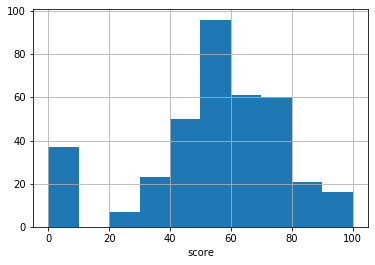

In [19]:
# Баллы по госэкзамену по математике
columns_info('score')
# stud_math.score.value_counts()
# Распределение близко к нормальному: мода близка к медиане,
# среднее близко к ним.
# Имеются выбросы, однако, все они лежат в диапазоне 0 - 100 баллов.
# Таким образом их удалять не имеет смысла.
# Пропущенные значения заменю средним по выборке
mean_score = stud_math.score.mean()
stud_math.score = stud_math.score.apply(lambda x: mean_score
                                        if pd.isnull(x) else x)
# Большинство учащихся написали госэкзамен на 50 и более баллов.
# Тем не менее, количество учащихся, написавших госэкзамен на 0 баллов достаточно велико

In [20]:
# Аббревиатура школы, в которой учится ученик
columns_info('school')
# Всего два уникальных значения, пропущенных нет.
# show_values(stud_math.school)

GP    332
MS     45
Name: school, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 0


In [21]:
# Пол ученика ('F' - женский, 'M' - мужской)
columns_info('sex')
# Всего два уникальных значения, пропущенных нет.
# Учащиеся в данном датасете распределены по половому признаку примерно поровну

F    194
M    183
Name: sex, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 0


In [22]:
# Тип адреса ученика ('U' - городской, 'R' - за городом)
columns_info('address')
# Всего два уникальных значения, пропущены 17.
# Была гипотеза что аббревиатура школы связана с адресом учника, кромк того
# мы выяснили что большинство живут рядом со школой.
# Для GP характерно, что большее количество учеников имеют городской адрес,
# для MS распределение поровну. Однако таких школ и меньше чем GP.
# Считаю, что для заполнения пропусков данных недостаточно, все nan заменим на None
replace_empties('address')
# show_values(stud_math.address)

U    279
R     81
Name: address, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 17


In [23]:
# Размер семьи('LE3' <= 3, 'GT3' >3)
columns_info('famsize')
# Всего два уникальных значения, пропущены 25.
# Большинство учащихся имеют семью из 3 и более человек.
# show_values(stud_math.famsize)
# Заменим пропущенные значения и nan на None
replace_empties('famsize')

GT3    248
LE3    104
Name: famsize, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 25


In [24]:
# Статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
columns_info('Pstatus')
# Всего два уникальных значения, пропущены 39.
# У большинство учащихся родители живут совместно.
# Была гипотеза заменить пропуски в соответствии с предыдущим пунктом,
# если семья больше 3 человек - "T", меньше - "A", однако, возможно
# размер семьи указан вне зависимости от совместного проживания.
#print(stud_math[stud_math['famsize'] == 'GT3'].Pstatus.value_counts())
#stud_math[stud_math['famsize'] == 'LE3'].Pstatus.value_counts()
# show_values(stud_math.Pstatus)
# Заменим пропущенные значения и nan на None
replace_empties('Pstatus')

T    306
A     32
Name: Pstatus, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 39


Выбросов нет!
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 2.7326203 
 Медиана[1]: 3.0 
 СКО[2]: 1.1072053 
 Межквартильный размах-IQR[3] 2.0 
 Размах[4] 4.0 
 25% перцентиль[5]: 2.0 
 75% перцентиль[6]: 4.0 
 Границы выбросов: [-1.0, 7.0].
Пропущенных значений в столбце: 3
None


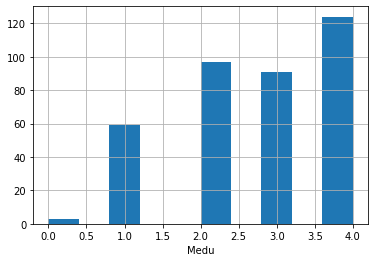

In [25]:
# Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы,
# 3 - среднее специальное или 11 классов, 4 - высшее)
columns_info('Medu')
# Наблюдаем отрицательное распредление, так как медиана и мода больше среднего.
# Выбросов нет, однако есть пропущенные значения.
# Пропущенные значения заменю медианой по выборке,
median_Medu = stud_math.Medu.median()
stud_math.Medu = stud_math.Medu.apply(lambda x: median_Medu
                                      if pd.isnull(x) else x)
# Большинство матерей имеют высшее образование,
# количество с 5-9 классами и средним специальным - примерно поровну

Имеются выбросы в кол-ве:  3
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 2.6016949 
 Медиана[1]: 2.0 
 СКО[2]: 2.2749025 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 40.0 
 25% перцентиль[5]: 2.0 
 75% перцентиль[6]: 3.0 
 Границы выбросов: [0.5, 4.5].
Пропущенных значений в столбце: 23
None


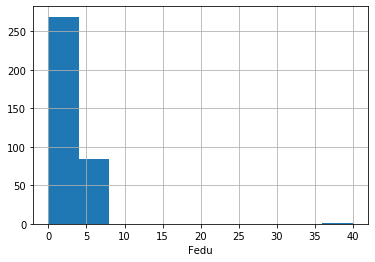

In [26]:
# Образование отца  (0 - нет, 1 - 4 класса, 2 - 5-9 классы,
# 3 - среднее специальное или 11 классов, 4 - высшее)
columns_info('Fedu')
# Наблюдаем положительное распредление, так как медиана и мода меньше среднего.
# Имеются выбросы и пропущенные пропущенные значения.
# Пропущенные значения заменю медианой по выборке,
median_Fedu = stud_math.Fedu.median()
stud_math.Fedu = stud_math.Fedu.apply(lambda x: median_Fedu
                                      if pd.isnull(x) else x)

Имеются выбросы в кол-ве:  3
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 2.5649867 
 Медиана[1]: 2.0 
 СКО[2]: 2.2089385 
 Межквартильный размах-IQR[3] 1.0 
 Размах[4] 40.0 
 25% перцентиль[5]: 2.0 
 75% перцентиль[6]: 3.0 
 Границы выбросов: [0.5, 4.5].


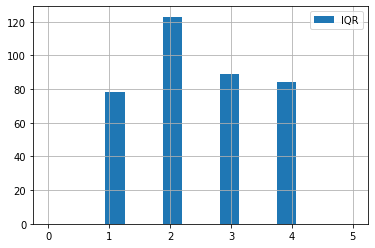

In [27]:
# Теперь проанализируем выбросы.
Fedu_stat_data = show_statistics(stud_math.Fedu)
perc25 = Fedu_stat_data[5]
perc75 = Fedu_stat_data[6]
IQR = Fedu_stat_data[3]

# формула интерквантильного расстояния
stud_math.Fedu.loc[stud_math.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 5),
                                                                                    label='IQR')
plt.legend()
# Уберем выбросы
stud_math = stud_math.loc[stud_math.Fedu.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
# Вывод: образование отцов хуже образования матерей.

In [28]:
# Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения,
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
columns_info('Mjob')
# Всего 5 уникальных значения, пропущены 17.
# Много неизвестных работ, из приведенных,
# большинство матерей состоят на гос службе
# show_values(stud_math.Mjob)

other       126
services     89
at_home      57
teacher      53
health       32
Name: Mjob, dtype: int64
Уникальных значений: 5
Пропущенных значений в столбце: 17


In [29]:
# Fjob — работа отца ('teacher' - учитель, 'health' - cфера здравоохранения,
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
columns_info('Fjob')
# Всего 5 уникальных значения, пропущены 35.
# Много неизвестных работ, из приведенных,
# большинство отцво также состоят на гос службе
# show_values(stud_math.Pstatus)

other       187
services     94
teacher      27
at_home      16
health       15
Name: Fjob, dtype: int64
Уникальных значений: 5
Пропущенных значений в столбце: 35


In [30]:
# Принято решение заменить пропуски в признаках работа матерей и отцов на 'other'
fill_other('Fjob')
fill_other('Mjob')

In [31]:
# Причина выбора школы ('home' - близость к дому,
# 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
columns_info('reason')
# Всего 4 уникальных значения, пропущены 17.
# Основным критерием выбора школы была образовательная программа, важны были
# также близость к дому и репутация.
# show_values(stud_math.reason)
# Заменим пропущенные значения на other
fill_other('reason')

course        134
reputation     96
home           94
other          33
Name: reason, dtype: int64
Уникальных значений: 4
Пропущенных значений в столбце: 17


In [32]:
#Опекун ('mother' - мать, 'father' - отец, 'other' - другое)
columns_info('guardian')
# Всего 3 уникальных значения, пропущены 30.
# Чаще всего в роли опекуна выступает мать
# show_values(stud_math.guardian)
# Заменим пропущенные значения на other
fill_other('guardian')

mother    235
father     84
other      25
Name: guardian, dtype: int64
Уникальных значений: 3
Пропущенных значений в столбце: 30


In [33]:
# Дополнительная образовательная поддержка (yes или no)
columns_info('schoolsup')
# Всего 2 уникальных значения, пропущены 9.
# Большинство учащихся не имеют дополнительного образования
# show_values(stud_math.schoolsup)
# Заменим пропущенные значения и nan на None
replace_empties('schoolsup')

no     317
yes     48
Name: schoolsup, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 9


In [34]:
# Посещал детский сад (yes или no)
columns_info('nursery')
# Всего 2 уникальных значения, пропущены 16.
# Большинство учащихся посещали десткий сад.

yes    283
no      75
Name: nursery, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 16


In [35]:
# Хочет получить высшее образование (yes или no)
columns_info('higher')
# Всего 2 уникальных значения, пропущены 17.
# Большинство учащихся хотят получить высшее образование.
# show_values(stud_math.schoolsup)
# Так как 90% значений - yes, то пропущенные заменю на yes.
stud_math['higher'] = stud_math['higher'].apply(lambda x: 'yes' if pd.isnull(x) else 'yes' if x == 'nan'
                                                else x)

yes    339
no      18
Name: higher, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 17


In [36]:
# Наличие интернета дома (yes или no)
columns_info('internet')
# Всего 2 уникальных значения, пропущены 33.
# Большинство учащихся имеют дома интернет.
# show_values(stud_math.internet)
# Заменим пропущенные значения и nan на None
replace_empties('internet')

yes    286
no      55
Name: internet, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 33


In [37]:
# В романтических отношениях (yes или no)
columns_info('romantic')
# Всего 2 уникальных значения, пропущены 30.
# Большинство учащихся не состоят в романтических отношениях
# show_values(stud_math.romantic)
# Заменим пропущенные значения и nan на None
replace_empties('romantic')

no     231
yes    113
Name: romantic, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 30


In [38]:
# Семейная образовательная поддержка (yes или no)
columns_info('famsup')
# Всего 2 уникальных значения, пропущены 35.
# Большинство учащихся имеют семейную образовательную поддержку
# show_values(stud_math.famsup)
# Заменим пропущенные значения и nan на None
replace_empties('famsup')

yes    207
no     132
Name: famsup, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 35


In [39]:
# Дополнительные платные занятия по математике (yes или no)
columns_info('paid')
# Всего 2 уникальных значения, пропущены 39.
# Большинство учащихся имеют дополнительные платные занятия по математике
# show_values(stud_math.paid)
# Заменим пропущенные значения и nan на None
replace_empties('paid')

no     192
yes    143
Name: paid, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 39


In [40]:
# Дополнительные внеучебные занятия (yes или no)
columns_info('activities')
# Всего 2 уникальных значения, пропущены 14.
# Дополнительные внеучебные занятия имеют половина учащихся
# show_values(stud_math.activities)
# Заменим пропущенные значения и nan на None
replace_empties('activities')

yes    187
no     173
Name: activities, dtype: int64
Уникальных значений: 2
Пропущенных значений в столбце: 14


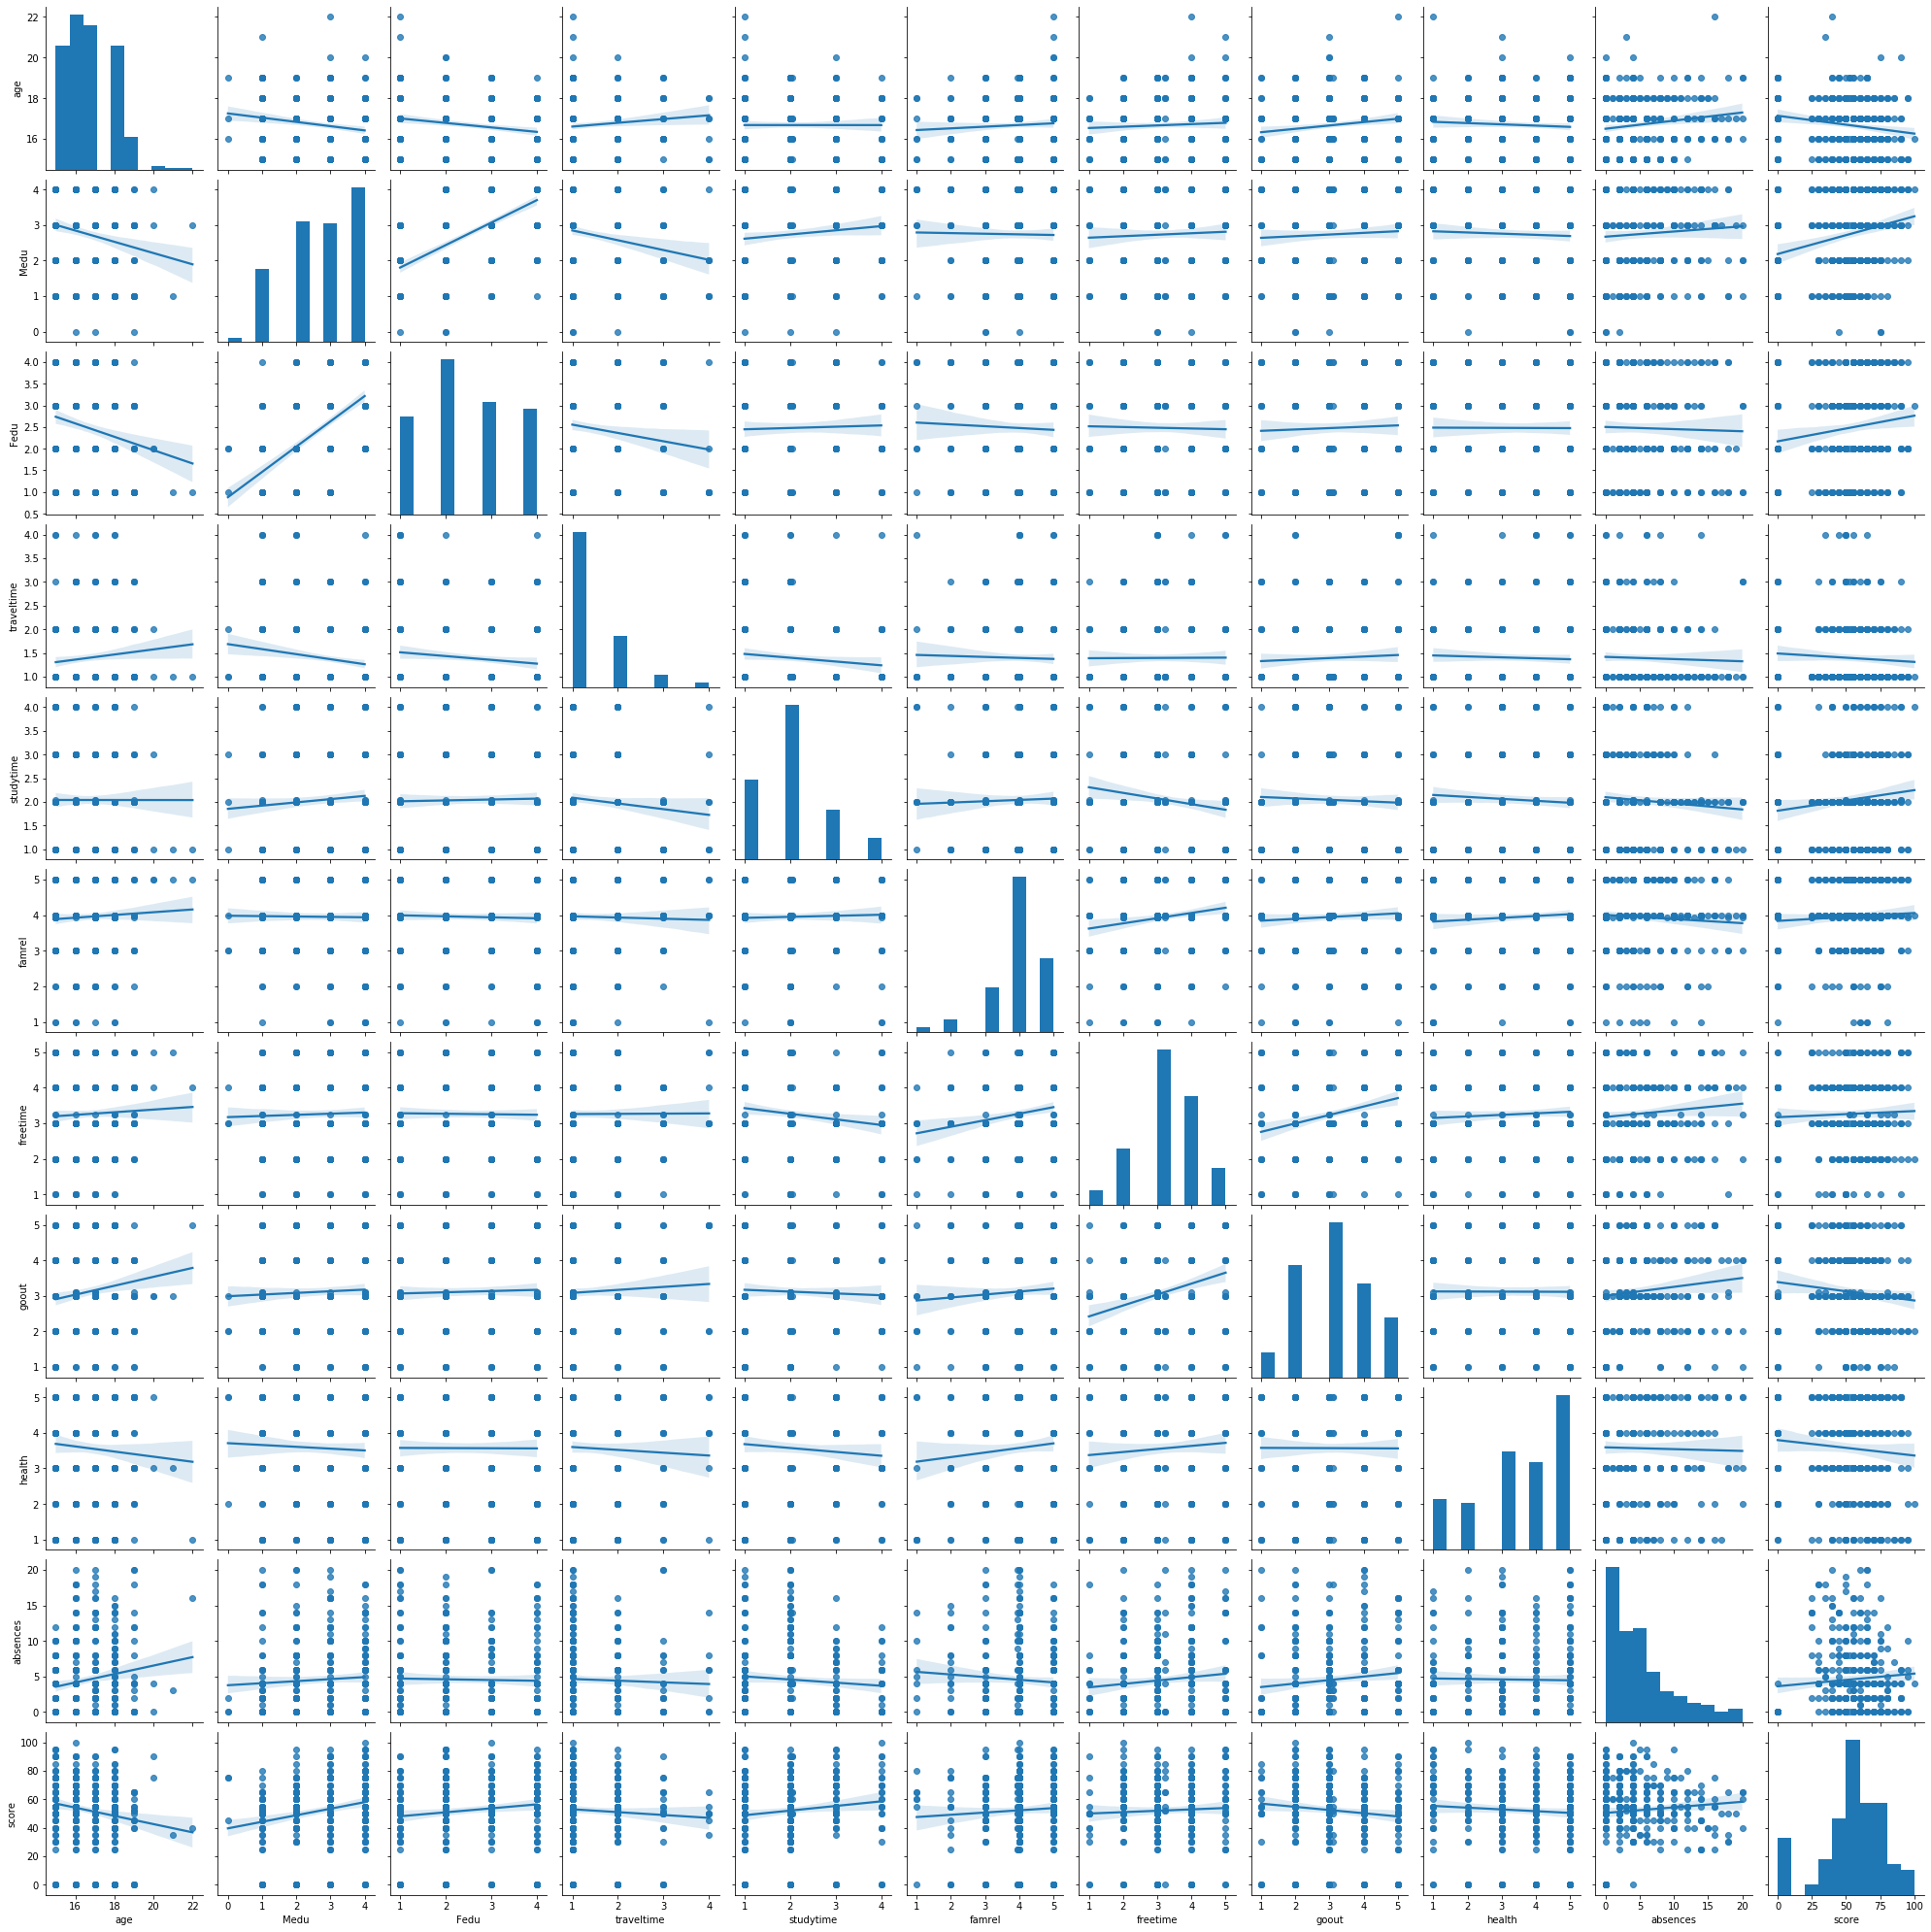

In [41]:
# КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
# Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков.
# Это поможет понять, какие параметры стоит оставить для модели,
# а какие — исключить.
# Корреляции рассмотрим только для числовых столбцов.
# Для быстрого построения графиков зависимости переменных можно воспользоваться
# функцией pairplot из модуля seaborn:
sns.pairplot(stud_math, kind='reg')

In [42]:
# Используем для наглядности матрицу корреляций:

In [52]:
# Матрица корреляций
stud_math.corr()

,age,Medu,Fedu,studytime,goout,score
age,1.000000,-0.182120,-0.184360,-0.000443,0.144447,-0.159694
Medu,-0.182120,1.000000,0.607412,0.089764,0.046580,0.221159
Fedu,-0.184360,0.607412,1.000000,0.023593,0.032745,0.128463
studytime,-0.000443,0.089764,0.023593,1.000000,-0.039192,0.118887
goout,0.144447,0.046580,0.032745,-0.039192,1.000000,-0.108045
score,-0.159694,0.221159,0.128463,0.118887,-0.108045,1.000000


In [44]:
# Почти полностью скоррелированных значений не наблюдается.
# Нам целесообразно оставлять в будущей модели те колонки, которые имеют
# наибольший (по модулю) коэффициент корреляции c колонкой score.
# Положительный коэф. корр. свидетельствует о росте score (баллов за тест
# по математике) с ростом значений данного столбца и наоборот.
# Будем оставлять те значения, коэфф. корр. которых по модулю > 0.1:
# age, Medu, Fedu,studytime,goout. Колонки absences,health,freetime,famrel, traveltime
# удалю из будущей модели:
stud_math.drop(['absences', 'health', 'freetime', 'famrel',
                'traveltime'], inplace=True, axis=1)

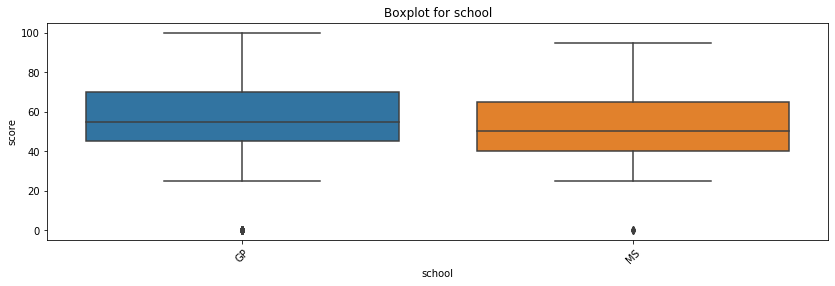

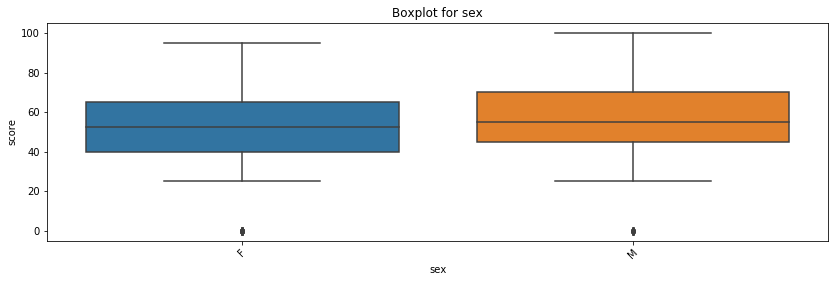

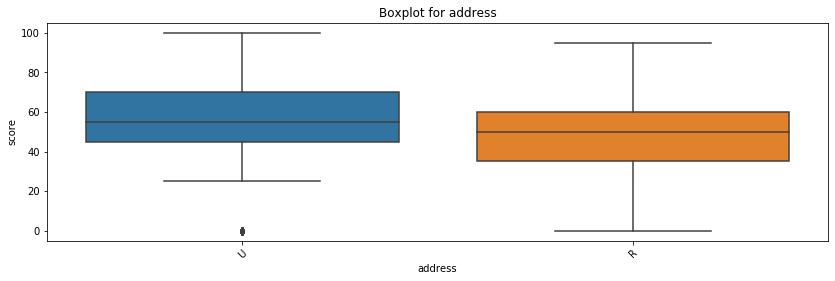

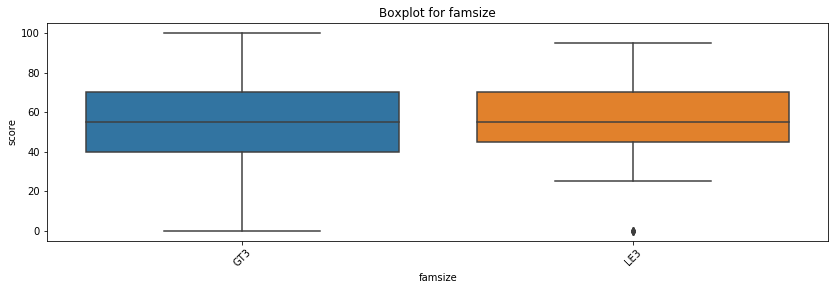

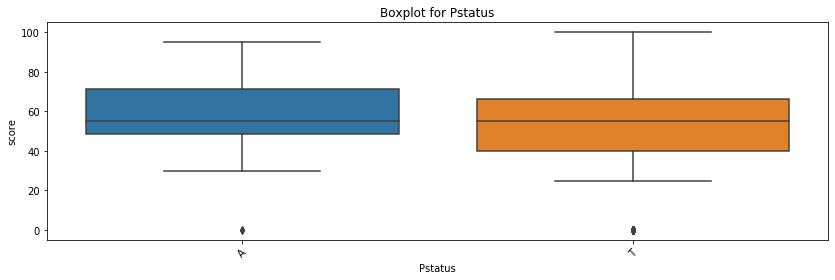

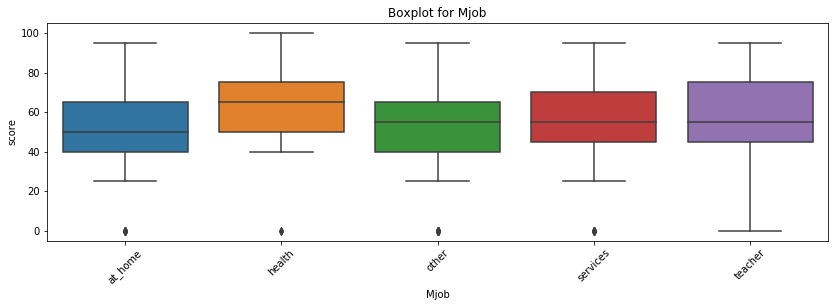

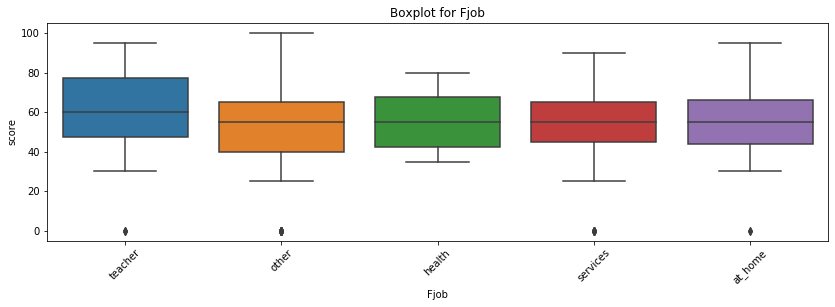

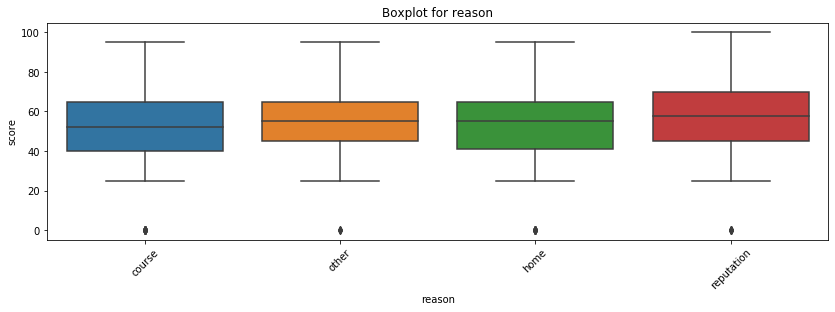

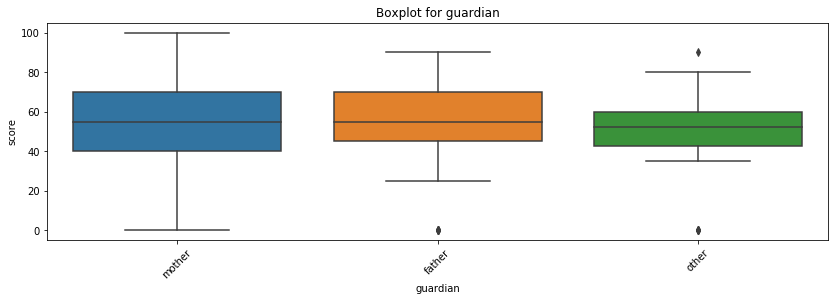

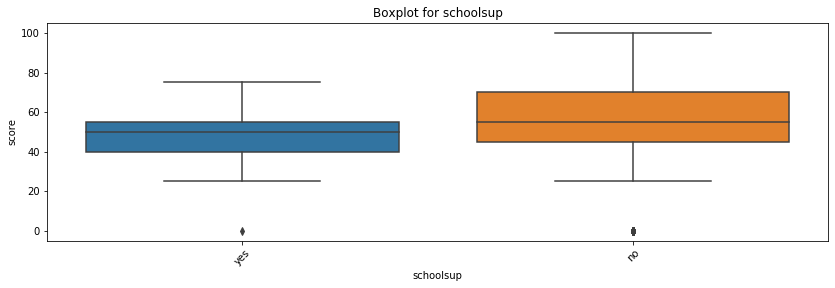

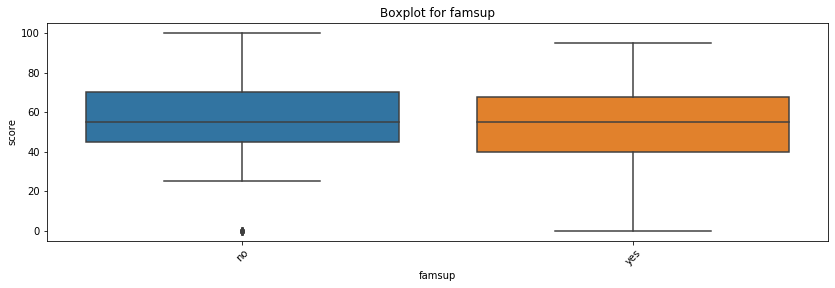

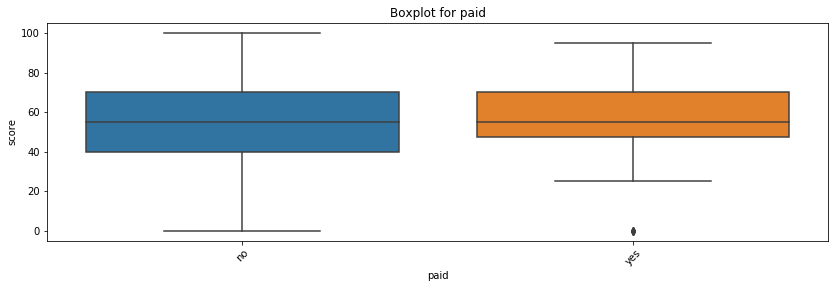

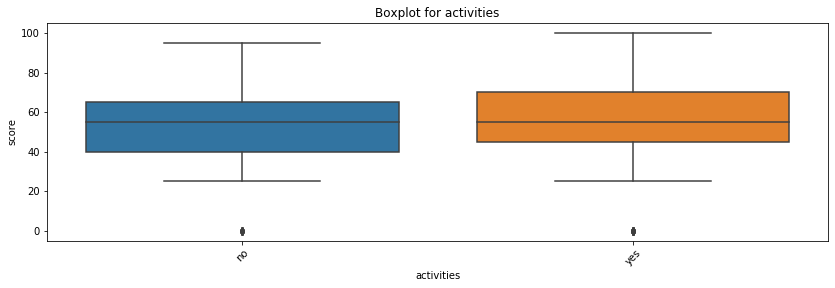

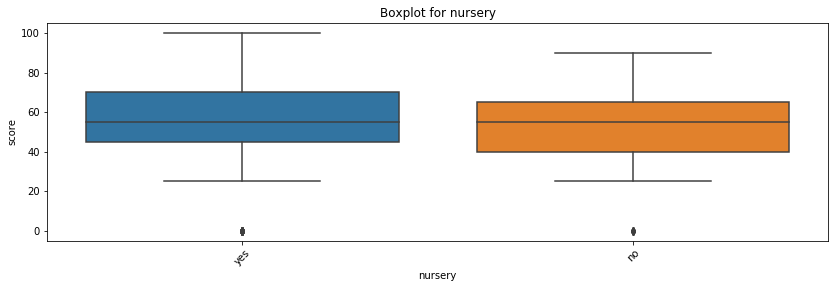

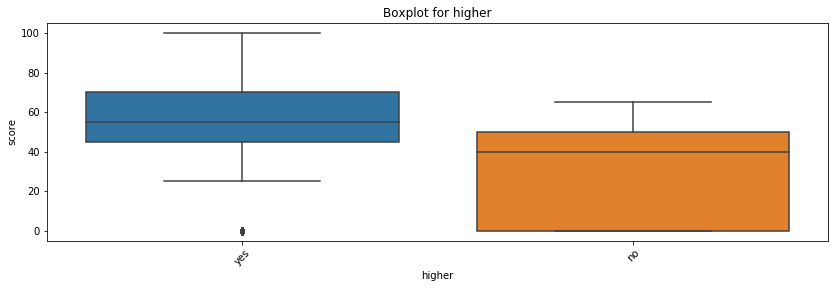

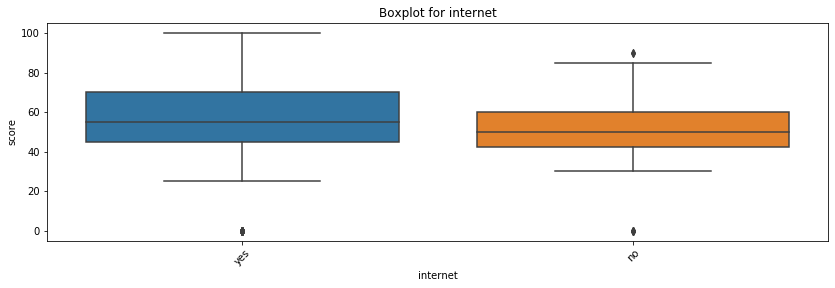

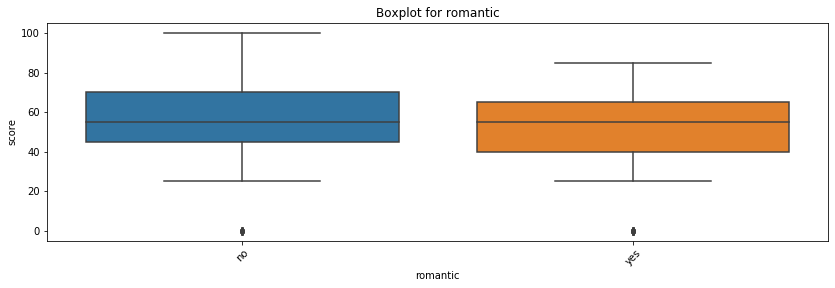

In [45]:
# Анализ номинативных переменных
# Так как уникальных значений в столбцах максимум 5, будем брать
# в рассмотрение по 5 значений.
# Номинативные переменные, которые осталось рассмотреть: company,
# specific_origin, company_location, bean_type, broad_origin.
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [46]:
# По графикам похоже, что все параметры, кроме sex,address,Pstatus,Mjob,schoolsup,
# higher,internet не сильно влияют на баллы по математике. Однако графики являются лишь
# вспомогательным инструментом, настоящую значимость различий может помочь
# распознать статистика. Проверим, есть ли статистическая разница в распределении
# оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую
# гипотезу о том, что распределения оценок батончиков по различным параметрам
# неразличимы:

In [47]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [48]:
# Как мы видим, серьёзно отличаются 6 параметров: sex,
# address, Mjob, paid, higher, romantic. Оставим эти переменные в
# датасете для дальнейшего построения модели.
stud_math.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian',
                'schoolsup', 'famsup', 'activities', 'nursery', 'internet'], inplace=True, axis=1)

#Выводы

In [49]:
# Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их
# успеваемость по математике были получены следующие выводы:
#
# 1) В данных достаточно много пропусков. Было принято решение для числовых
# переменных заменять пропущенные значения на среднее (при нормальном и близком к
# нормальному распределениях) или на медиану (при положительном или отрицательном
# распределениях), для номинативных пременных пропуски и 'nan' были заменены на None.
# 2) В данных, если пользоваться формулой интерквантильного распределения,
# часто выстречаются выбросы. Однако, лишь в трех случаях потребовалось их убрать.
#В остальных признаках выбросы не выходили за рациональный диапазон значений и по соображениям здравого смысла
#было решено их оставить
# 3) При корреляционном анализе было принято решение оставить только столбцы с коэфф.
# корреляции свыше 0.1 по модулю.
# Самые важные параметры, которые предлагается использовать в дальнейшем для
# построения модели, это:
#                       age, Medu, Fedu,studytime,goout,
#                       sex,address, Mjob, paid, higher, romantic

In [50]:
display(stud_math)

,sex,age,address,Medu,Fedu,Mjob,studytime,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,None,yes,None,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,yes,yes,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,U,1.0,1.0,other,2.0,no,yes,no,1.0,0.0
391,M,17,U,3.0,1.0,services,1.0,no,yes,no,5.0,80.0
392,M,21,R,1.0,1.0,other,1.0,no,yes,no,3.0,35.0
393,M,18,R,3.0,2.0,services,1.0,no,yes,no,1.0,50.0
